# Bài tập lập trình: Softmax Regression với TensorFlow

### Hướng dẫn làm bài
- Trong bài tập này bạn sẽ sử dụng TensorFlow 2.x để xây dựng mô hình Softmax Regression.
- Sau khi bạn viết code của mình xong, hãy chạy dòng code đó để xem kết quả bên dưới.

### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**
- **Không thay đổi dòng code return của hàm**

Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO: Lập trình tại đây` và thay thế các vị trí `None`.

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Các bài tập sẽ được chấm dựa trên các test-case.
* Sử dụng TensorFlow API một cách hiệu quả và đúng cách.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, losses, metrics, optimizers
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


## 1. Tải dữ liệu MNIST

In [ ]:
(X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Số lượng nhãn
num_classes = 10

num_of_train_images, width, height = X_train.shape
image_vector_size = width * height

print(f"""
  Số lượng ảnh train: {num_of_train_images}
  Chiều dài ảnh train: {width}
  Chiều cao ảnh train: {height}
  Chiều ảnh được duỗi: {image_vector_size}
""")


  Số lượng ảnh train: 60000
  Chiều dài ảnh train: 28
  Chiều cao ảnh train: 28
  Chiều ảnh được duỗi: 784



## 2. Tiền xử lý dữ liệu với TensorFlow

### 2.1. Chuẩn hóa và reshape dữ liệu

```TODO 1:``` Preprocessing dữ liệu với TensorFlow

In [ ]:
def preprocess_data(X, Y):
  """
  Tiền xử lý dữ liệu: reshape và chuẩn hóa
  Đầu vào:
    X: numpy array, shape (batch_size, 28, 28)
    Y: numpy array, shape (batch_size,)
  Đầu ra:
    X_processed: tf.Tensor, shape (batch_size, 784), giá trị từ 0-1
    Y_processed: tf.Tensor, shape (batch_size, 10), one-hot encoded
  """
  # TODO: Lập trình tại đây

  # Chuyển đổi sang tensor và chuẩn hóa
  # Reshape về (batch_size, 784) và chia cho 255.0
  X_processed = tf.convert_to_tensor(X, dtype=tf.float32) / 255.0
  X_processed = tf.reshape(X_processed, [X.shape[0], -1])

  # Chuyển đổi nhãn sang one-hot encoding
  Y_processed = tf.one_hot(Y, 10)
  Y_processed = tf.convert_to_tensor(Y_processed, dtype=tf.float32)

  return X_processed, Y_processed

In [ ]:
# Test code
try:
  X_train_processed, Y_train_processed = preprocess_data(X_train[:100], Y_train[:100])
  X_val_processed, Y_val_processed = preprocess_data(X_val[:100], Y_val[:100])

  print(f"X_train shape: {X_train_processed.shape}")
  print(f"Y_train shape: {Y_train_processed.shape}")
  print(f"X values range: [{tf.reduce_min(X_train_processed):.1f}, {tf.reduce_max(X_train_processed):.1f}]")
  print(f"Y one-hot sum: {tf.reduce_sum(Y_train_processed[0]):.1f}")
except Exception as e:
  print(f"Lỗi thực thi: {e}")

X_train shape: (100, 784)
Y_train shape: (100, 10)
X values range: [0.0, 1.0]
Y one-hot sum: 1.0


**Kết quả mong đợi:**
```
X_train shape: (100, 784)
Y_train shape: (100, 10)
X values range: [0.0, 1.0]
Y one-hot sum: 1.0
```

```TODO 2:``` Tiến hành preprocessing toàn bộ dữ liệu

In [ ]:
try:
  # TODO: Lập trình tại đây
  X_train_processed, Y_train_processed = preprocess_data(X_train, Y_train)  # Preprocessing train set
  X_val_processed, Y_val_processed = preprocess_data(X_val, Y_val)      # Preprocessing validation set

  print(f"Training data shape: {X_train_processed.shape}")
  print(f"Validation data shape: {X_val_processed.shape}")
except Exception as e:
  print(f"Lỗi thực thi: {e}")

Training data shape: (60000, 784)
Validation data shape: (10000, 784)


## 3. Xây dựng mô hình Softmax Regression với TensorFlow

### 3.1. Tạo mô hình sử dụng Keras Sequential API

```TODO 3:``` Xây dựng Softmax Regression model

In [ ]:
def create_softmax_model(input_size, num_classes):
  """
  Tạo mô hình Softmax Regression
  Đầu vào:
    input_size: int, kích thước input (784)
    num_classes: int, số lượng classes (10)
  Đầu ra:
    model: tf.keras.Model
  """
  # TODO: Lập trình tại đây
  # Tạo Sequential model với 1 Dense layer có activation='softmax'
  model = keras.Sequential([
      layers.InputLayer(input_shape=(input_size,)),
      layers.Dense(num_classes),
      layers.Activation('softmax')
  ])

  return model

In [ ]:
# Test code
try:
  model = create_softmax_model(784, 10)
  print("Model architecture:")
  model.summary()

  # Test với 1 batch nhỏ
  test_input = tf.random.normal((5, 784))
  test_output = model(test_input)
  print(f"\nTest output shape: {test_output.shape}")
  print(f"Output sum (should be ~1.0): {tf.reduce_sum(test_output[0]):.3f}")

except Exception as e:
  print(f"Lỗi thực thi: {e}")

Model architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)


Test output shape: (5, 10)
Output sum (should be ~1.0): 1.000


### 3.2. Compile mô hình

```TODO 4:``` Compile mô hình với optimizer, loss và metrics phù hợp

In [ ]:
def compile_model(model, learning_rate=0.01):
  """
  Compile mô hình với optimizer, loss, và metrics
  Đầu vào:
    model: tf.keras.Model
    learning_rate: float, tốc độ học
  """
  # TODO: Lập trình tại đây

  # Compile model với:
  # - optimizer: SGD với learning_rate
  # - loss: categorical_crossentropy
  # - metrics: accuracy
  model.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  return model

In [ ]:
# Test code
try:
  model = create_softmax_model(784, 10)
  model = compile_model(model, learning_rate=0.01)

  print("Model compiled successfully!")
  print(f"Optimizer: {type(model.optimizer).__name__}")
  print(f"Loss function: {model.loss}")
  print(f"Metrics: {[m.name for m in model.metrics]}")

except Exception as e:
  print(f"Lỗi thực thi: {e}")

Model compiled successfully!
Optimizer: SGD
Loss function: categorical_crossentropy
Metrics: ['loss', 'compile_metrics']


### 3.3. Training với validation

```TODO 5:``` Thiết lập training loop

In [ ]:
def train_model(model, X_train, Y_train, X_val, Y_val, epochs=30, batch_size=32):
  """
  Train mô hình
  Đầu vào:
    model: tf.keras.Model
    X_train, Y_train: training data
    X_val, Y_val: validation data
    epochs: số epoch
    batch_size: kích thước batch
  Đầu ra:
    history: training history
  """
  # TODO: Lập trình tại đây

  # Sử dụng model.fit() để train
  history = model.fit(
      X_train, Y_train,
      validation_data=(X_val,Y_val),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1
  )

  return history

### 3.4. Thực hiện training

In [ ]:
try:
  # Tạo và compile model
  model = create_softmax_model(784, 10)
  model = compile_model(model, learning_rate=0.01)

  # Training
  history = train_model(
    model, X_train_processed, Y_train_processed,
    X_val_processed, Y_val_processed,
    epochs=10, batch_size=128
  )

  print("Training completed!")

except Exception as e:
  print(f"Lỗi thực thi: {e}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5475 - loss: 1.6298 - val_accuracy: 0.8373 - val_loss: 0.8060
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8314 - loss: 0.7701 - val_accuracy: 0.8645 - val_loss: 0.6058
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.6028 - val_accuracy: 0.8744 - val_loss: 0.5249
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.5305 - val_accuracy: 0.8817 - val_loss: 0.4797
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8752 - loss: 0.4924 - val_accuracy: 0.8872 - val_loss: 0.4504
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.4672 - val_accuracy: 0.8907 - val_loss: 0.4289
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8833 - loss: 0.4456 - val_accuracy: 0.8932 - val_loss: 0.4127
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8842 - loss: 0.4329 - val_accuracy: 0.

### 3.5. Visualization và Evaluation

```TODO 6:``` Vẽ đồ thị loss và accuracy

In [ ]:
def plot_training_history(history):
  """
  Vẽ đồ thị training history
  Đầu vào:
    history: keras History object
  """
  # TODO: Lập trình tại đây

  # Tạo subplot với 2 đồ thị: loss và accuracy
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  # Vẽ loss
  # ax1.plot loss và val_loss
  ax1.plot(history.history['loss'], label='Training Loss')
  ax1.plot(history.history['val_loss'], label='Validation Loss')

  # Vẽ accuracy
  # ax2.plot accuracy và val_accuracy
  ax2.plot(history.history['accuracy'], label='Training Accuracy')
  ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')

  plt.tight_layout()
  plt.show()

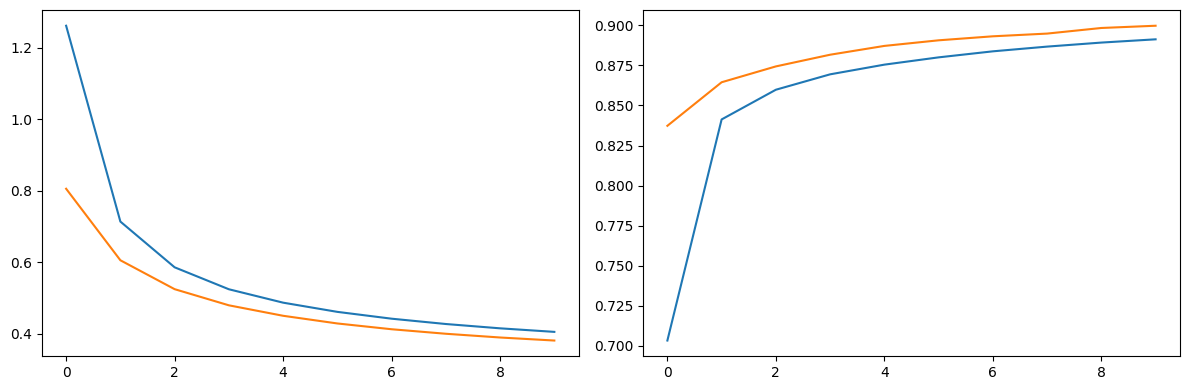

In [ ]:
# Test visualization
try:
  if 'history' in locals():
    plot_training_history(history)
  else:
    print("Chạy training trước để có history data")
except Exception as e:
  print(f"Lỗi thực thi: {e}")

### 3.6. Evaluation và Prediction

```TODO 7:``` Tạo hàm đánh giá và dự đoán

In [ ]:
def evaluate_model(model, X_test, Y_test):
  """
  Đánh giá mô hình
  Đầu vào:
    model: trained model
    X_test, Y_test: test data
  Đầu ra:
    loss, accuracy: float values
  """
  # TODO: Lập trình tại đây

  # Sử dụng model.evaluate()
  results = model.evaluate(X_test, Y_test, verbose=1)
  loss, accuracy = results[0], results[1]

  return loss, accuracy

def predict_samples(model, X_samples, Y_true, num_samples=5):
  """
  Dự đoán và hiển thị một số mẫu
  Đầu vào:
    model: trained model
    X_samples: input samples (flattened)
    Y_true: true labels (not one-hot)
    num_samples: số mẫu cần hiển thị
  """
  # TODO: Lập trình tại đây

  # Dự đoán
  predictions = model.predict(X_samples)  # model.predict()
  predicted_classes = tf.argmax(predictions, axis=1).numpy()  # tf.argmax()

  # Hiển thị kết quả
  print("Prediction Results:")
  for i in range(min(num_samples, len(Y_true))):
    print(f"Sample {i}: True={Y_true[i]}, Predicted={predicted_classes[i]}, Confidence={tf.reduce_max(predictions[i]):.3f}")

In [ ]:
# Test evaluation
try:
  if 'model' in locals():
    # Evaluate on validation set
    val_loss, val_accuracy = evaluate_model(model, X_val_processed, Y_val_processed)
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Predict some samples
    predict_samples(model, X_val_processed[:10], Y_val[:10])
  else:
    print("Train model trước khi evaluate")

except Exception as e:
  print(f"Lỗi thực thi: {e}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.4347
Validation Loss: 0.3811
Validation Accuracy: 0.8998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Prediction Results:
Sample 0: True=7, Predicted=7, Confidence=0.990
Sample 1: True=2, Predicted=2, Confidence=0.754
Sample 2: True=1, Predicted=1, Confidence=0.925
Sample 3: True=0, Predicted=0, Confidence=0.994
Sample 4: True=4, Predicted=4, Confidence=0.800


### 3.7. So sánh với implementation từ scratch

```TODO 8:``` Tạo custom training loop để hiểu rõ hơn về cách TensorFlow hoạt động

In [ ]:
def custom_training_loop(model, X_train, Y_train, X_val, Y_val, epochs=30, batch_size=128):
  """
  Custom training loop sử dụng GradientTape
  Đầu vào:
    model: tf.keras.Model (chưa compile)
    X_train, Y_train: training data
    X_val, Y_val: validation data
    epochs: số epoch
    batch_size: kích thước batch
  """
  # TODO: Lập trình tại đây

  # Thiết lập optimizer và loss function
  optimizer = optimizers.SGD(learning_rate=0.001) # SGD optimizer
  loss_fn = losses.CategoricalCrossentropy()    # CategoricalCrossentropy

  # Training metrics
  train_loss = tf.keras.metrics.Mean()
  train_accuracy = tf.keras.metrics.CategoricalAccuracy()

  # Training loop
  for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Reset metrics
    train_loss.reset_state()
    train_accuracy.reset_state()

    # Create batches
    dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
    dataset = dataset.batch(batch_size)

    # Training step
    for batch_x, batch_y in dataset:
      # TODO: Implement training step với GradientTape
      with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(batch_x, training=True)
        # Compute loss
        loss = loss_fn(batch_y, predictions)

      # Compute gradients
      gradients = tape.gradient(loss, model.trainable_variables)
      # Apply gradients
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      # Update metrics
      train_loss.update_state(loss)
      train_accuracy.update_state(batch_y, predictions)

    # Validation
    val_predictions = model(X_val)
    val_loss = loss_fn(Y_val, val_predictions)
    val_accuracy = tf.keras.metrics.categorical_accuracy(Y_val, val_predictions)
    val_accuracy = tf.reduce_mean(val_accuracy)

    print(f"Loss: {train_loss.result():.4f}, Accuracy: {train_accuracy.result():.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

In [ ]:
# Test custom training loop
try:
  # Tạo model mới cho custom training
  custom_model = create_softmax_model(784, 10)

  # Custom training (không cần compile)
  print("Training với custom loop:")
  custom_training_loop(
    custom_model,
    X_train_processed[:5000], Y_train_processed[:5000],  # Subset for faster training
    X_val_processed[:1000], Y_val_processed[:1000],
    epochs=3, batch_size=64
  )

except Exception as e:
  print(f"Lỗi thực thi: {e}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training với custom loop:
Epoch 1/3
Loss: 2.3621, Accuracy: 0.1130, Val Loss: 2.2968, Val Accuracy: 0.1260
Epoch 2/3
Loss: 2.2473, Accuracy: 0.1610, Val Loss: 2.2097, Val Accuracy: 0.1970
Epoch 3/3
Loss: 2.1544, Accuracy: 0.2448, Val Loss: 2.1346, Val Accuracy: 0.2750


### Vậy là bạn đã xây dựng thành công mô hình Softmax Regression với TensorFlow/Keras!

**Những điều bạn đã học được:**
1. Sử dụng TensorFlow/Keras để preprocessing dữ liệu
2. Xây dựng mô hình Sequential với Dense layer và Softmax activation
3. Compile mô hình với optimizer, loss function và metrics
4. Training mô hình với validation
5. Visualization training history
6. Evaluation và prediction
7. Custom training loop với GradientTape

**So sánh với NumPy thuần:**
- TensorFlow tự động tính gradient và backpropagation
- Built-in optimizer và loss functions
- GPU acceleration tự động
- Dễ dàng scaling và deployment